# Income Analysis & Classification

In [40]:
import pandas as pd 
import numpy as np

In [41]:
data = pd.read_csv('Videodata.csv')

In [42]:
data.head()
#data of income
#numeric & categorical columns

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Data Analysis

In [43]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 32561 rows and 15 columns


In [44]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [45]:
#the oldest person
data.iloc[data['age'].idxmax()]

age                            90
 workclass                Private
 fnlwgt                     51744
 education                HS-grad
 education-num                  9
 marital-status     Never-married
 occupation         Other-service
 relationship       Not-in-family
 race                       Black
 sex                         Male
 capital-gain                   0
 capital-loss                2206
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 222, dtype: object

In [46]:
#the youngest person
data.iloc[data['age'].idxmin()]

age                            17
 workclass                      ?
 fnlwgt                    304873
 education                   10th
 education-num                  6
 marital-status     Never-married
 occupation                     ?
 relationship           Own-child
 race                       White
 sex                       Female
 capital-gain               34095
 capital-loss                   0
 hours-per-week                32
 native-country     United-States
 income                     <=50K
Name: 106, dtype: object

In [47]:
data[' workclass'].value_counts().sort_values(ascending=False)
#data mostly from private sector workers

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [48]:
data[' income'].value_counts().sort_values(ascending=True)

 >50K      7841
 <=50K    24720
Name:  income, dtype: int64

In [49]:
import matplotlib
matplotlib.rc('figure',figsize=(20,10))

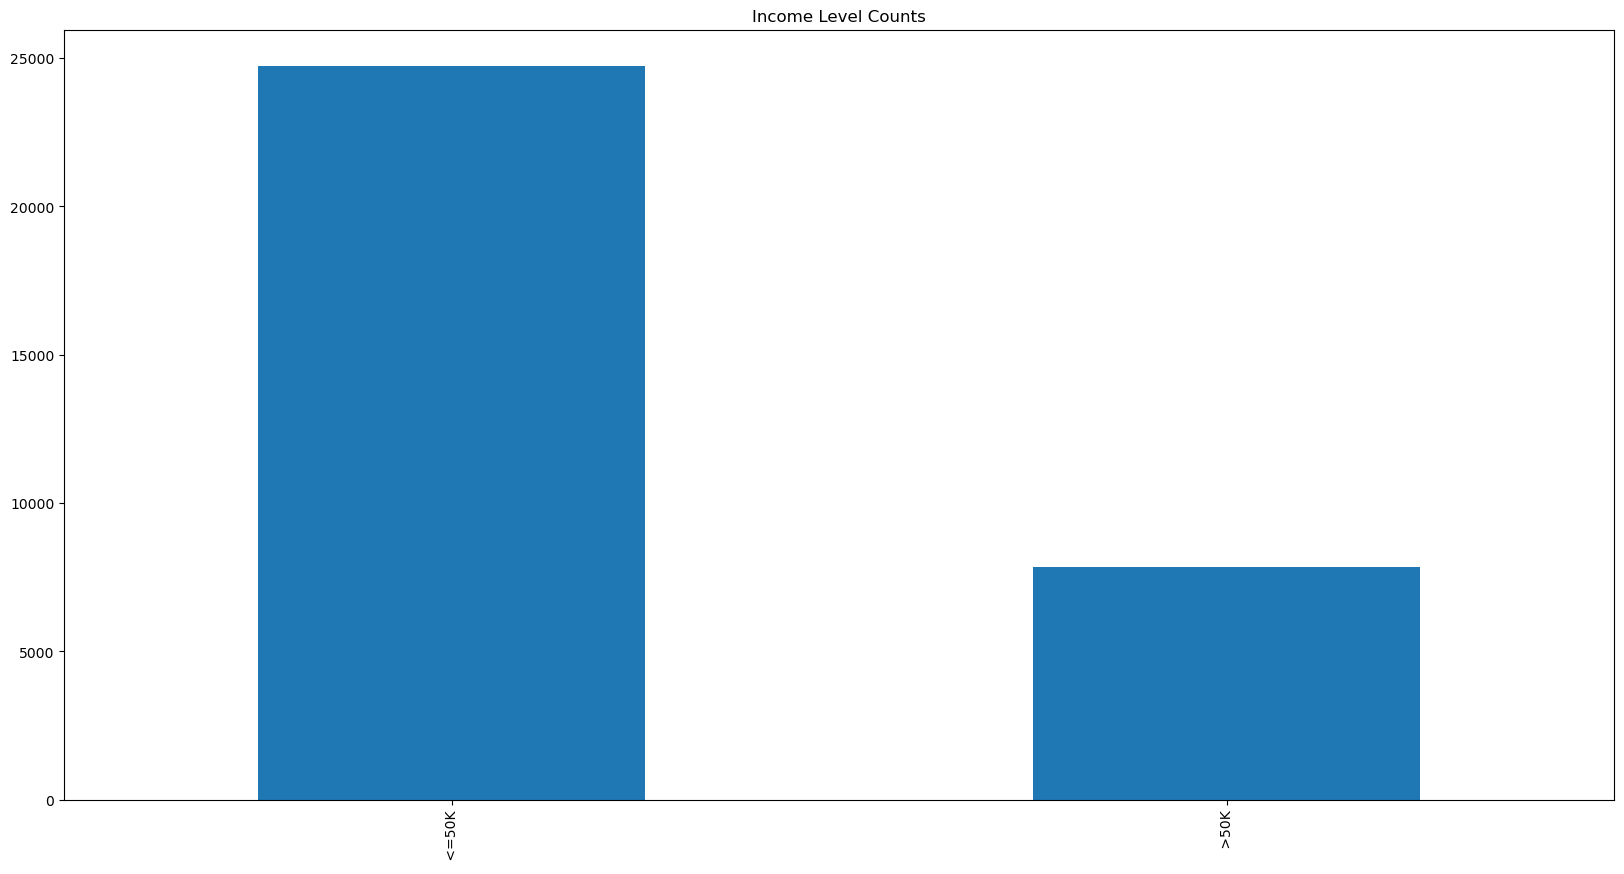

In [50]:
import matplotlib.pyplot as plt

data[' income'].value_counts().plot(kind='bar')
plt.title('Income Level Counts')
plt.show()

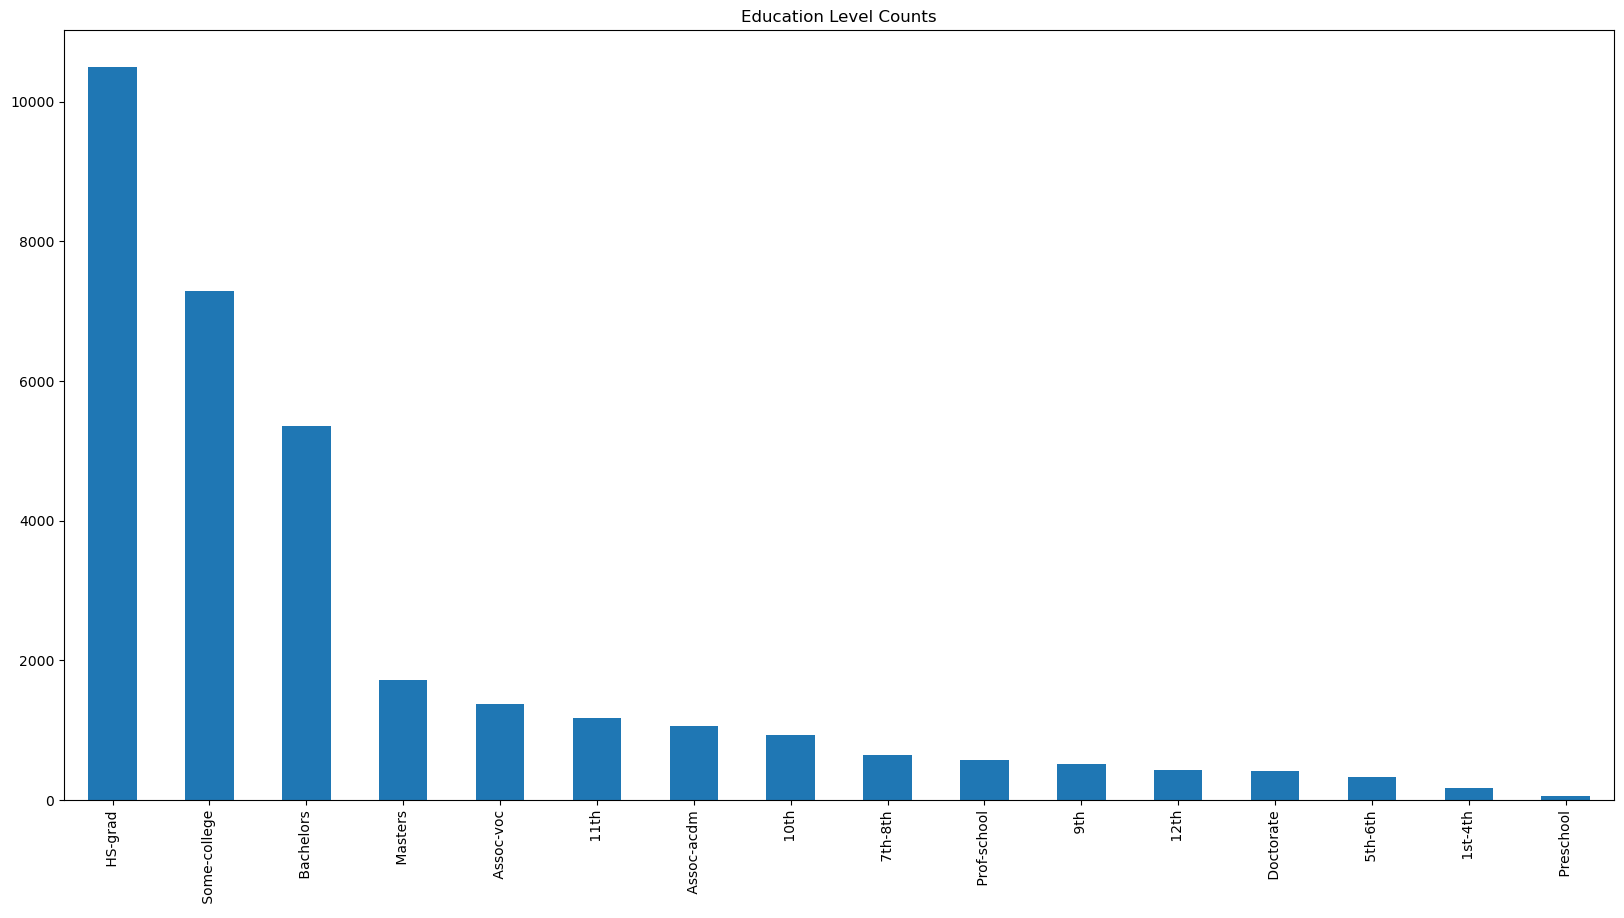

In [51]:
data[' education'].value_counts().plot(kind='bar')
plt.title('Education Level Counts')
plt.show()

In [52]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

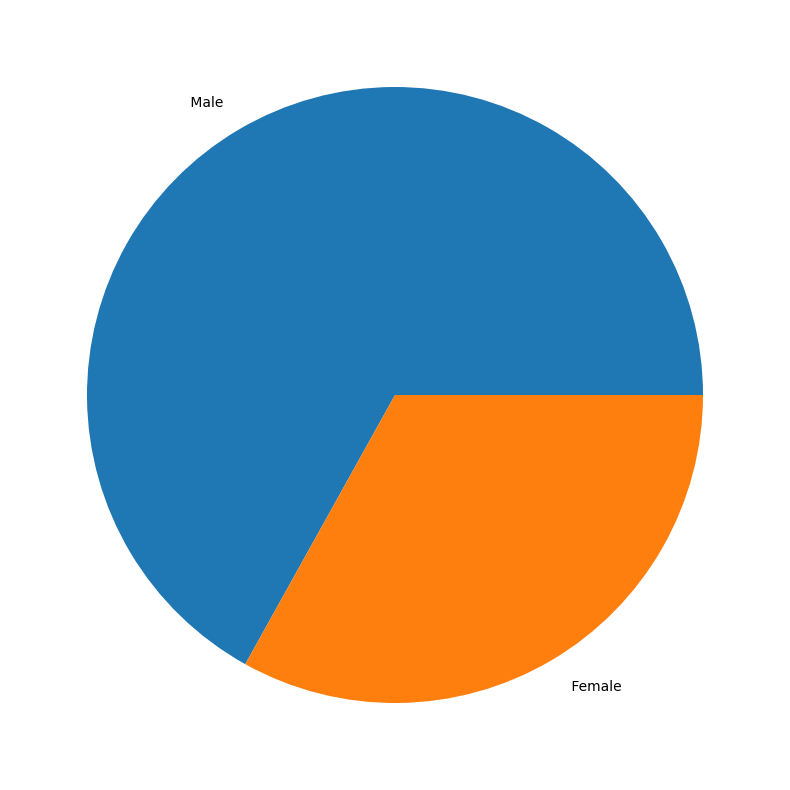

In [53]:
sexlabels = data[' sex'].unique()
plt.pie(data[' sex'].value_counts(), labels=sexlabels)
plt.show()

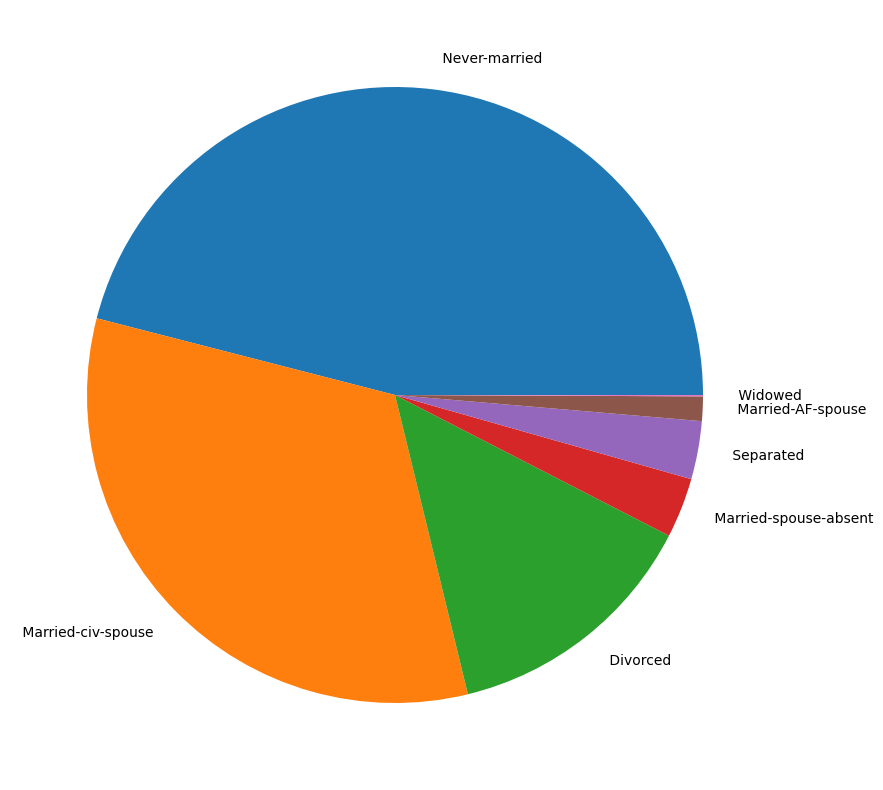

In [54]:
maritalstatuslabels = data[' marital-status'].unique()
plt.pie(data[' marital-status'].value_counts(), labels=maritalstatuslabels)
plt.show()

In [55]:
# let's fix the columns now

data = data[['age',' workclass',' education',' marital-status', ' occupation',' hours-per-week', ' native-country',' income']]
data.columns = [['age','workclass','education','marital-status', 'occupation','hours-per-week', 'native-country','income']]

data.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K


In [57]:
#null values check
data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [59]:
#duplicates check
data.duplicated().sum()

7226

In [61]:
data.drop_duplicates(inplace=True)

In [63]:
#validate
data.duplicated().sum()

0

## 2. Machine Learning

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [78]:
# transform categorical columns to numerical ones
data['workclass'] = labelencoder.fit_transform(data['workclass'])
data['education'] = labelencoder.fit_transform(data['education'])
data['occupation'] = labelencoder.fit_transform(data['occupation'])
data['marital-status'] = labelencoder.fit_transform(data['marital-status'])
data['native-country'] = labelencoder.fit_transform(data['native-country'])
data['income'] = labelencoder.fit_transform(data['income'])

data

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income,native_country
0,39,7,9,4,1,40,39,0,39
1,50,6,9,2,4,13,39,0,39
2,38,4,11,0,6,40,39,0,39
3,53,4,1,2,6,40,39,0,39
4,28,4,9,2,10,40,5,0,5
...,...,...,...,...,...,...,...,...,...
32552,43,4,8,2,12,45,39,0,39
32553,32,4,12,4,13,11,36,0,36
32554,53,4,12,2,4,40,39,1,39
32555,22,4,15,4,11,40,39,0,39


<AxesSubplot:xlabel='None', ylabel='None'>

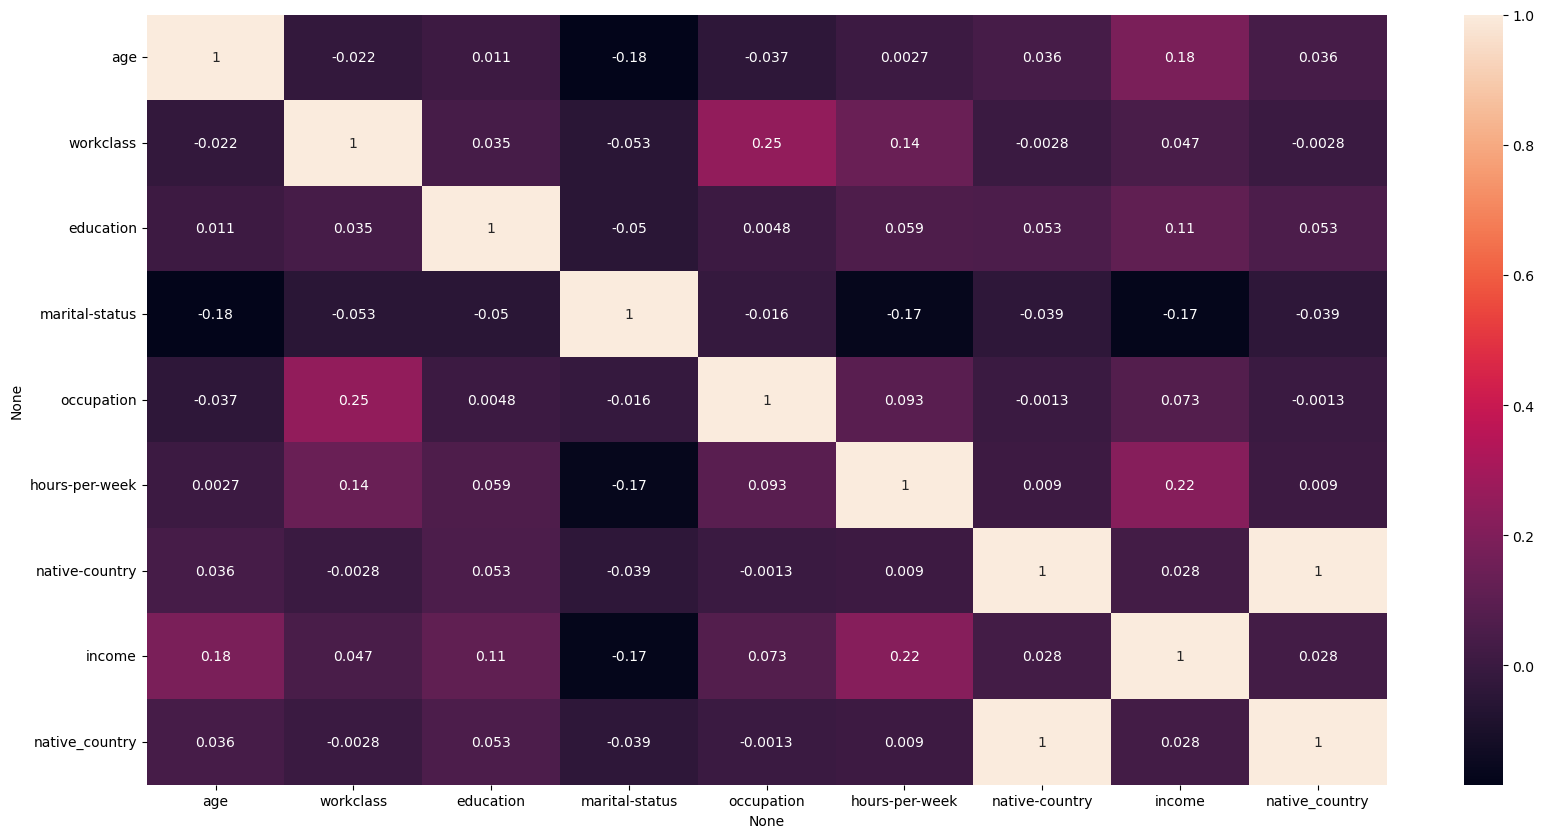

In [79]:
import seaborn as sns

sns.heatmap(data=data.corr(), annot=True)

In [83]:
X = data[['age', 'workclass','education','marital-status',    'occupation','hours-per-week','native-country','native_country']]
y = data[['income']]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [91]:
#scale / normalize all values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [92]:
#also define a function that computes the accuracy of the model 
from sklearn.metrics import accuracy_score
def modelresults(predictions):
    print('The accuracy score of the model is {}'.format(accuracy_score(y_test, predictions)))

In [96]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [98]:
log_predictions = log_model.predict(scaled_X_test)
modelresults(log_predictions)

The accuracy score of the model is 0.7324036311011709


In [109]:
# KNNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps=[('knn' , knn)])
param_grid = {'knn__n_neighbors' : k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy')
cv_classifier.fit(scaled_X_train, y_train)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [111]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
modelresults(pred_gridknn)

The accuracy score of the model is 0.7905538744901986


In [113]:
# support vector classifier
from sklearn.svm import SVC
svm = SVC()

param_grid_svr = {'C' : [0.1, 0.5, 1], 'kernel' : ['linear', 'rbf', 'poly']}

gridsvr = GridSearchCV(svm, param_grid_svr)
gridsvr.fit(scaled_X_train, y_train)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [116]:
pred_svr = gridsvr.predict(scaled_X_test)
modelresults(pred_svr)

The accuracy score of the model is 0.7760820944612551


In [117]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()

n_estimators = [32, 64, 128]
max_features = [2, 3, 4, 5]
bootstrap = [True, False]
oob_score = [True, False]

param_grid_rfr = {'n_estimators' : n_estimators, 'max_features' : max_features, 'bootstrap' : bootstrap, 'oob_score' : oob_score}
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)
grid_rfr.fit(scaled_X_train, y_train)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionW

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [32, 64, 128],
                         'oob_score': [True, False]})

In [119]:
pred_rfr = grid_rfr.predict(scaled_X_test)
modelresults(pred_rfr)

The accuracy score of the model is 0.7710827522694382


KNeighbors are the best performing model

## 3. Test

In [123]:
#let us pick an average entry
columniterate = 1 
for index in X.columns:
    mean = data[index].mean()
    print('The mean of columns {} is {}'.format(columniterate, mean))
    columniterate+=1

The mean of columns 1 is 40.22893230708506
The mean of columns 2 is 3.89449378330373
The mean of columns 3 is 10.075350305900928
The mean of columns 4 is 2.5483323465561476
The mean of columns 5 is 6.733096506808763
The mean of columns 6 is 40.92776791000592
The mean of columns 7 is 36.10447996842313
The mean of columns 8 is 36.10447996842313


In [124]:
#define a function that will help us classify incomes
def prediction(new_entry):
    pred = cv_classifier.predict(new_entry.reshape(1, -1))
    if pred == 0:
        return 'Below or equal to 50k'
    else:
        return 'More than 50k'

In [126]:
new_income_entry = np.array([40, 3, 10, 2, 6, 40, 36, 36])
prediction(new_income_entry)

'Below or equal to 50k'